<h1><center>Práctica Aprendizaje Airbnb: Modelos.</center></h1>

# 0. Librerías

In [23]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

En primer lugar, obtenemos los datos del análsis exploratorio hecho previamente ya habiendo separado en datos de entrenamiento y datos de test

In [3]:
# Importacion de datos
X_train = pd.read_csv('./Datos/X_train.csv')
X_test = pd.read_csv('./Datos/X_test.csv')
y_train = pd.read_csv('./Datos/y_train.csv')
y_test = pd.read_csv('./Datos/y_test.csv')

# 3. Modelos

Para evaluar los distintos modelos vamos a tener en cuenta que:

Para un problema de **regresión** utilizamos las medidas:

Sobre otro conjunto de evaluación $\mathcal{D_{te}}$, podemos evaluar la calidad de las predicciones. Como $y$ es una variable continua ahora, no tiene sentido utilizar la tasa de aciertos o accuracy. Las más comunes son 

* Error cuadrático medio $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

* Coeficiente de determinación $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [4]:
# Librerias necesarias
from sklearn.metrics import mean_squared_error, r2_score

Así, para realizar la comparación entre los modelos vamos a guardar las métricas de cada uno en los diccionarios:

In [5]:
# Metricas
rmse = {}
r2 = {}

También tendremos en cuenta la matriz de confusión para estos modelos. Para ello, agruparemos las predicciones en las diferentes categorias

In [6]:
# Librerias necesarias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Metricas
mc = {}

Clasificamos las predicciones hechas por el modelo de regresión lineal en las tres categoricas y comparamos con los datos de *y_test_clas*.

In [8]:
# Rangos 
y = pd.concat([y_train,y_test],axis = 0)
y = y.values.flatten()

# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Cortes
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

[(2.638, 4.511], (4.511, 5.011], (5.011, 7.955]]
Categories (3, interval[float64, right]): [(2.638, 4.511] < (4.511, 5.011] < (5.011, 7.955]]


In [10]:
# Cortes
bins = [2.638, 4.511, 5.011, 7.955]

# Clasificacion 
y_test_clas = pd.qcut(y_test.values.flatten(), 3, labels=False)

## 3.1 Regresión lineal

El modelo de regresión lineal tiene la siguiente forma parámetrica:

$$
\hat{y} = \beta_0 + \beta_1 x_1 \ldots + \beta_p x_p 
$$

donde $\hat{y} \in \mathbb{R}$ es la variable a predecir y los datos tienen $p$ columnas, $x \in \mathbb{R}^p$. 

Asumiendo un conjunto de datos de entrenamiento, $\mathcal{D_{tr}} = \lbrace (x, y) \rbrace$, los parámetros $\beta, \beta_0$ se pueden ajustar resolviendo el siguiente problema de optimización (mínimos cuadrados):

$$
\min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\hat{y} - y )^2 = \min_{\beta, \beta_0} \sum_{x \in \mathcal{D_{tr}}} (\beta^\intercal x + \beta_0 - y )^2
$$

In [11]:
# Librerias
from sklearn.linear_model import LinearRegression

Ajustamos el modelo de regresión lineal

In [12]:
# Ajuste del modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

En primer lugar, vemos los coeficientes del modelo. A partir de estos coeficientes, podemos determinar qué características son más relevantes a la hora de predecir el precio de las casas.

In [13]:
# Coeficientes del modelo
print('Término independiente: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Término independiente: 
 [4.67398534]
Coeficientes: 
 [[ 0.09733613 -0.11306671  0.3478591   0.00353231  0.02744057  0.01839787
  -0.03913463 -0.03963155  0.25109677 -0.07538428 -0.17571249]]


Como se trata de un modelo de regresión podemos validarlo con los residuos, junto con las correspondientes métricas.

Primero, estudiamos los residuos del modelo para comprobar las hipótesis de normalidad, indepedendencia y homocedasticidad.
Este estudio lo comprobaremos una única vez. 

In [14]:
# Librerias
import scipy.stats as stats
import statsmodels.api as sm

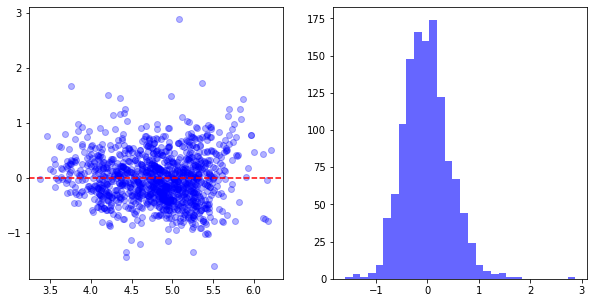

In [15]:
# Residuos
res = y_test - y_pred

# Graficos 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(y_pred,res, alpha = 0.3, color='blue') # Res vs fitt
axs[0].axhline(y=0, color='r', linestyle='--')
axs[1].hist(res, bins=30, alpha = 0.6, color='blue') # Histograma de los residuos

plt.show()

Podemos observer que hay un residuo muy grande. Eliminarlo si sigue ahí y volver a ajustar el modelo

In [16]:
# Posicion del residuo mas alto
pos = res['price'].sort_values(ascending=False).index[0]

# Localizacion del residuo
X_test.iloc[165,:]

latitude            0.658923
longitude          -0.102752
accommodates        0.011886
beds               -0.657623
security_deposit   -1.367867
cleaning_fee        0.634211
extra_people       -1.133644
review             -1.442748
Entire home/apt     1.000000
Private room        0.000000
Shared room         0.000000
Name: 165, dtype: float64

In [17]:
# Eliminacion de la observacion
X_test.drop(165,axis=0,inplace=True)
y_test.drop(165,axis = 0, inplace=True)
y_pred = reg.predict(X_test)

# Clasificacion 
y_test_clas = pd.qcut(y_test.values.flatten(), 3, labels=False)

In [ ]:
# Residuos
res = y_test - y_pred

# Graficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(y_pred,res, alpha = 0.3, color='blue') # Res vs fitt
axs[0].axhline(y=0, color='r', linestyle='--')
axs[1].hist(res, bins=30, alpha = 0.6, color='blue') # Histograma de los residuos

plt.show()

En segundo lugar, calculamos las métricas y vemos el ajuste del modelo.

In [18]:
# Metricas de test
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_reg  = r2_score(y_test, y_pred)

print("Error cuadratico medio: %.2f" % rmse_reg)
print('R2: %.2f' % r2_reg)

Error cuadratico medio: 0.44
R2: 0.55


Por último, almacenamos los datos para la comparativa final

In [19]:
# Almacenamiento de metricas
rmse['LReg'] = rmse_reg
r2['LReg'] = r2_reg

Como ya comentamos, podemos estudiar la matriz de confusión para así poder comparar todos lo métodos. Para ello, clasificamos las predicciones hechas por el modelo de regresión lineal en las tres categoricas y comparamos con los datos de *y_test_clas*.

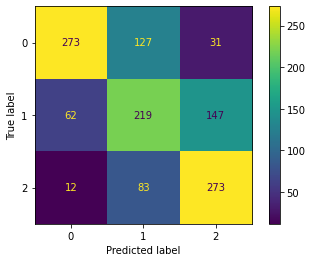

In [20]:
# Matriz de confusion
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_reg = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_reg).plot()

# Almacenamiento de metricas
mc['LReg'] = mc_reg

## 3.2 K-NN

El algoritmo de los k vecinos más cercanos es un algoritmo de aprendizaje supervisado usado tanto en problemas de regresión como en problemas de clasificación. Es un método no paramétrico que asume que existen similaridades en la proximidad sin necesidad de que los datos respondan a una linealidad. 

El algoritmo calcula las distancias entre los datos de test y todos los puntos de los datos de entrenamiento, escogiendo un número $k$ de distancias mínimas. Para realizar la predicción se realiza un promedio de los valores dependientes.

En primer lugar, queremos encontrar el número de vecinos óptimo. Para ello, creamos una rejilla con diferentes valores de $k$ , que iremos recorriendo, y almacenando sus correspondientes métricas al ajustar el modelo. Así, tomaremos aquel $k$ que aporte un mejor valor para las métricas.

In [22]:
# Librerias
from sklearn.neighbors import KNeighborsRegressor

Separamos nuevamente en train y test para realizar cross-validation

In [24]:
# Pasticion de datos
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

Recorremos la rejilla para encontrar los parámetros

In [25]:
# Posible numero de vecinos
ks = list(range(1,10))

# Almacenamiento de metricas
rmses = {}
r2s = {}

# Hiperparametrizacion
for k in ks:
    
    # Ajuste del modelo 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_cv_train, y_cv_train)
    
    # Predicciones sobre test
    y_pred = knn.predict(X_cv_test)
    
    # Metricas
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

# Optimo
min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

Mejor hiperparámtero RMSE: 9
Mejor hiperparámetro R2: 9


Mediante los gráficos de codo, podemos decidir el número $k$ de vecinos óptimo para el problema.

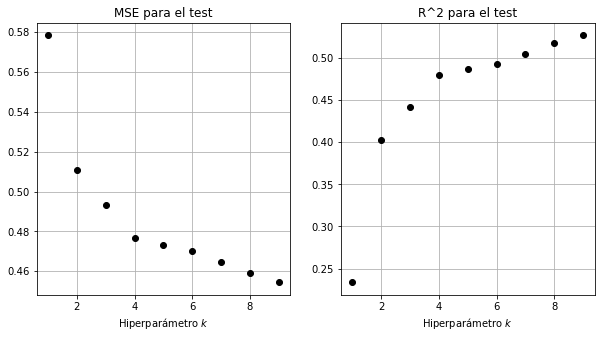

In [31]:
# Error cuadratico medio para el test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

# R2 para el test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

# Graficos 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(ks_arr, rmses_arr, 'ok')
ax1.grid(True)
ax1.set_xlabel('Hiperparámetro $k$');
ax1.set_title('MSE para el test');

ax2.plot(ks_arr, r2s_arr, 'ok')
ax2.grid(True)
ax2.set_xlabel('Hiperparámetro $k$');
ax2.set_title('R^2 para el test');

Así, decidimos ajustar el modelo con $k=7$ vecinos

In [32]:
# Ajuste del modelo
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
    
# Predicciones
y_pred = knn.predict(X_test)

Calculamos las medidas de error y ajuste del modelo

In [34]:
# Metricas de test
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_knn  = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f" % rmse_knn)
print('Variance score: %.2f' % r2_knn)

Root Mean squared error: 0.43
Variance score: 0.57


In [36]:
# Almacenamiento de metricas
rmse['KNN'] = rmse_knn
r2['KNN'] = r2_knn

Nuevamente, aun tratándose de un problema de regresión, hallamos la matriz de confusión conviertiendo las predicciones con su correspondiente clasificación

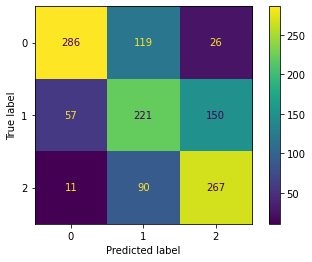

In [38]:
# Matriz de confusion 
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_knn = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_knn).plot()

# Almacenamiento de metricas
mc['knn'] = mc_knn

## 3.3 Árbol de decisión simple

Un árbol de decisión es un modelo de aprendizaje automático que se utiliza para predecir una variable objetivo a partir de un conjunto de variables de entrada. El árbol se divide en ramas que representan decisiones basadas en las variables de entrada, y las hojas del árbol representan la predicción final para la variable objetivo.

Cada nodo en el árbol corresponde a una pregunta sobre una de las variables de entrada y la respuesta a esa pregunta determina en qué rama del árbol continuar.

In [ ]:
# Librerias
from sklearn.tree import DecisionTreeRegressor

En primer lugar, encontramos la profundiad óptima del árbol. Para ello, utilizamos una rejilla 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

Utilizamos los datos separados de train para cross validation

In [ ]:
ks = list(range(1,10))

# En este diccionario iremos guardando las metricas sobre test asociadas a cada valor de $k$
rmses = {}
r2s = {}

# Vamos recorriendo la rejilla con un bucle for
for k in ks:
    
    # Definimos el modelo con el valor de hiperparametro correspondiente
    tree = DecisionTreeRegressor(max_depth=k)
    
    # Ajustamos a los datos de entrenamiento
    tree.fit(X_cv_train, y_cv_train)
    
    # Hacemos predicciones sobre los datos de test
    y_pred = tree.predict(X_cv_test)
    
    # Evaluamos y guardamos la metrica correspondiente 
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

In [ ]:
# Error cuadratico medio para el test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

plt.plot(ks_arr, rmses_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('MSE para el test');

In [ ]:
# R2 para el test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

plt.plot(ks_arr, r2s_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('R^2 para el test');

Ajustamos el modelo

In [ ]:
# Definimos el modelo
arbol = DecisionTreeRegressor(max_depth=5)

# Ajustamos el modelo
arbol.fit(X_train, y_train)

# Realizamos predicciones sobre test
y_pred = arbol.predict(X_test)

Hallamos las métricas para el conjunto de test

In [ ]:
# Medidas de error para el test
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred))
r2_tree= r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_tree)
# Puntaje de Varianza
print('Variance score: %.2f' % r2_tree)

In [ ]:
# Almacenamos los datos
rmse['Arbol'] = rmse_tree
r2['Arbol'] = r2_tree

In [ ]:
# Matriz de confusion para Tree Regressor
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_tree = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_tree).plot();

# Almacenamos los datos
mc['Arbol'] = mc_tree

Como el árbol de decisión sigue una estructura similar al pensamiento humano, tiene fácil representación en el plano. 

In [ ]:
from sklearn import tree 

In [ ]:
plt.figure(figsize=(50,20))
tree.plot_tree(arbol)
plt.show()

La estructura de un árbol de decisión permite detectar de forma sencilla aquellas variables que son más influyentes en la predicción.

In [ ]:
# Importancia de las varibales
feature_importances = pd.Series(arbol.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

## 3.4 Bagging

Los algoritmos de bagging son algoritmos de ensemble que tiene como objetivo reducir la varianza de cada uno de los algoritmos individuales agregando diferentes algoritmos y sus respectivas predicciones.

Así, los algoritmos de bagging crean diferentes muestras boostrap con remplazaiento del conjunto de datos de entrenamiento, y cada método individual es entrenado en una de las diferentes remuestras creadas.

Aunque se puede crear un propio algoritmo de ensemble, normalmente se suelen utilizar árboles de decisión. 

In [ ]:
# Librerias 
from sklearn.ensemble import BaggingRegressor

Primero, encontramos los hiperparámetros óptimos del modelo, esto es, el número de modelos individuales o "*estimadores*"

In [ ]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
ks = np.array(range(1,100,5))

# En este diccionario iremos guardando las metricas sobre test asociadas a cada valor de $k$
rmses = {}
r2s = {}

# Vamos recorriendo la rejilla con un bucle for
for k in ks:
    
    # Definimos el modelo con el valor de hiperparametro correspondiente
    clf = BaggingRegressor(n_estimators = k)
    
    # Ajustamos a los datos de entrenamiento
    clf.fit(X_cv_train, y_cv_train)

    # Hacemos predicciones sobre los datos de test
    y_pred = clf.predict(X_cv_test)
    
    # Evaluamos y guardamos la metrica correspondiente 
    rmse_k = np.sqrt(mean_squared_error(y_cv_test, y_pred))
    r2_k  = r2_score(y_cv_test, y_pred)
    rmses[k] = rmse_k
    r2s[k] = r2_k

min_rmses = min(rmses,key=rmses.get)
max_r2s = max(r2s, key=r2s.get)
    
print("Mejor hiperparámtero RMSE:", min_rmses)
print("Mejor hiperparámetro R2:", max_r2s)

In [ ]:
# Error cuadratico medio para el test
ks_arr = np.fromiter(rmses.keys(), dtype=int)
rmses_arr = np.fromiter(rmses.values(), dtype=float)

plt.plot(ks_arr, rmses_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('MSE para el test');

In [ ]:
# R2 para el test
ks_arr = np.fromiter(r2s.keys(), dtype=int)
r2s_arr = np.fromiter(r2s.values(), dtype=float)

plt.plot(ks_arr, r2s_arr, 'ok')
plt.grid(True)
plt.xlabel('Hiperparámetro $k$');
plt.ylabel('R^2 para el test');

En primer lugar, ajustamos el modelo tomando como modelos individuales 50 árboles regresores.

In [ ]:
# Ajustamos el modelo
bagg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=50, random_state=0).fit(X_train, y_train)
# Hacemos predicciones
y_pred = bagg.predict(X_test)

Calculamos las métricas y el ajuste del modelo

In [ ]:
# Medidas de error
rmse_bagg = np.sqrt(mean_squared_error(y_test, y_pred))
r2_bagg  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_bagg)
# Puntaje de Varianza
print('Variance score: %.2f' % r2_bagg)

Almacenamos las métricas correspondientes

In [ ]:
# Almacenamos los datos
rmse['Bagging'] = rmse_bagg
r2['Bagging'] = r2_bagg

In [ ]:
# Matriz de confusion para Bagging Regressor
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_bagg_reg = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_bagg_reg).plot();

# Almacenamos los datos
mc['Bagg_Reg'] = mc_bagg_reg

## 3.5 Random Forest

Se trata de un modelo de ensemble que combia varios árboles de decisión para hacer predicciones. Así, cada árbol de decisión es entrenado en un subconjunto de los datos de entrenamiento elegido de manera aleatoria, lo que ayuda a reducir el problema de overfitting (o sobreajuste). Las predicciones se realizan teniendo en cuenta la clasificación mayoritaria de las predicciones de cada árbol individual.

Se trata de un tipo específico de método de Bagging, pues además de usar muestras bootstrap de los datos de entrenamiento, cada árbol se entrena en un subconjunto aleatorio de características.

In [ ]:
# Librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Como sucedía con los árboles de decisión, podemos utilizar técnicas de cross validation para hallar:
* **n_estimators**: Número de árboles de decisión para el random forest. En general, el ajuste del modelo es mejor mayor es este hiperparámetro, pero también incrementa el coste computacional para realizar predicciones.
* **max_depth**: La profundidad del árbol. Como ya vimos, si la profundidad es muy alta puede llevarnos a overfitting mientras que si es muy baja podremos tener problemas de underfitting.

Es este caso vamos a utilizar la función RandomizedSearch()

In [ ]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
# Posibles profundidades y estimadores 
ps = np.array(range(50,250))
ns = np.array(range(3,10))

h_parameters = {'n_estimators': ps,
                'max_depth': ns}

# Definimos el modelo
rf = RandomForestRegressor()

# Busqueda aleatorizada de hiperparametros 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = h_parameters, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_cv_train, y_cv_train)

# Mejores parametros
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

Con estos parámteros, podemos ajustar el modelo

In [ ]:
# Ajustamos el modelo
rf = RandomForestRegressor(n_estimators=180,max_depth=9)
rf.fit(X_train, y_train)

# Hacemos predicciones sobre los datos de test
y_pred = rf.predict(X_test)

Calculamos las métricas para ver el ajuste del modelo

In [ ]:
# Medidas de error para test
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_rf)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_rf)

In [ ]:
# Almacenamos los datos
rmse['RandomForest'] = rmse_rf
r2['RandomForest'] = r2_rf

También podemos calcular la matriz de confusión

In [ ]:
# Matriz de confusion para Random Forest
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_rf = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_rf).plot();

# Almacenamos los datos
mc['RandomForest_Reg'] = mc_rf

## 3.6 GradientBoost

Gradient boostig es un algoritmo de machine learning que se basa en la creación de un conjunto de modelos de predicción débiles, generalmente árboles de decisión, que se combinan para formar un modelo de predicción más fuerte. En cada iteración, el algoritmo ajusta los pesos de los modelos débiles para corregir los errores del modelo anterior. Esto se hace mediante la optimización de una función de pérdida diferenciable.

In [ ]:
# Librerias
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
# Hiperparametros
# Posibles profundidades y estimadores 
ps = np.array(range(50,250))
ns = np.array(range(3,10))

h_parameters = {'n_estimators': ps,
                'max_depth': ns}

# Definimos el modelo
gb = GradientBoostingRegressor()

# Busqueda aleatorizada de hiperparametros 
rand_search = RandomizedSearchCV(gb, 
                                 param_distributions = h_parameters, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_cv_train, y_cv_train)

# Mejores parametros
best_rf = rand_search.best_estimator_
print('Mejores hiperparámetros:',  rand_search.best_params_)

In [ ]:
# Ajustamos el modelo
gb = GradientBoostingRegressor(n_estimators=63, max_depth=6)
gb.fit(X_train, y_train)

# Hacemos predicciones en test
y_pred = gb.predict(X_test)

In [ ]:
# Medidas de error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gb  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_gb)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_gb)

# Almacenamos los datos
rmse['GradientBoost'] = rmse_gb
r2['GradientBoost'] = r2_gb

In [ ]:
# Matriz de confusion para Random Forest
y_pred_clas = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_gb_reg = confusion_matrix(y_test_clas, y_pred_clas)
ConfusionMatrixDisplay(confusion_matrix=mc_gb_reg).plot();

# Almacenamos los datos
mc['GB_Regg'] = mc_gb_reg

## 3.7 XGBoost

El algoritmo XGBoost es similar al boosting de gradiente, pero incluye algunas mejoras importantes. Por ejemplo, utiliza regularización L1 y L2 para reducir el overfitting y mejorar la generalización del modelo. Además, utiliza una técnica llamada "pruning" para eliminar los nodos de los árboles de decisión que no son útiles para la predicción.

In [ ]:
#!pip install xgboost

In [ ]:
# Librerias
from xgboost import XGBRegressor

In [ ]:
X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
import xgboost as xgb

# Instanciacion del objeto
xg_boost = xgb.XGBRegressor(objective='reg:squarederror')

# Posibles numero de arboles
n_arboles = {'n_estimators': [10,25,50,100,150,175,200]}

# Hiperparametrizacion
cv = GridSearchCV(estimator=xg_boost, param_grid=n_arboles, n_jobs=-1, cv=5)
cv.fit(X_cv_train, y_cv_train)

# nuemro de arboles optimo
print('Numero optimo de arboles:',cv.best_params_)

In [ ]:
# Ajustamos el modelo
xgb = XGBRegressor(n_estimators=25)
xgb.fit(X_train, y_train)

# Hacemos predicciones en test
y_pred = xgb.predict(X_test)

Estudiamos las diferentes métricas

In [ ]:
# Medidas de error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb  = r2_score(y_test, y_pred)
# Error Cuadrado Medio
print("Root Mean squared error: %.2f" % rmse_gb)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_gb)

# Almacenamos los datos
rmse['GradientBoost'] = rmse_gb
r2['GradientBoost'] = r2_gb

In [ ]:
# Matriz de confusion para Random Forest
y_pred = pd.cut(y_pred.flatten(), bins=bins, labels=False)

mc_xgb_reg = confusion_matrix(y_test_clas, y_pred)
ConfusionMatrixDisplay(confusion_matrix=mc_xgb_reg).plot();

# Almacenamos los datos
mc['XGBoost_Regg'] = mc_xgb_reg

# 4. Comparación de modelos

# 5. Conclusiones

Otra parte importante es saber qué variables son importantes a la hora de predecir el precio de las casas. En los diferentes algoritmos hemos estado viendo gráficos de *feature_importance* donde estudiamos el peso de cada variable en la regresión o clasificación. En todos los casos, obteníamos algo similar a:

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();